# Linear Regression

### Motivation
Linear regression is usually one of the first machine learning algorithms that people learn. Its aim is to take a set of data points $(x_i, y_i)$ and find a best fit linear mapping from the independent variable $x$ to the dependent variable $y$. Once armed with this linear mapping, we can make a prediction about some new value of $y$ when given a new value of $x$. This is a useful tool when trying to predict values of a continuous nature, such as the typical example of predicting housing prices given some input variable, $\textit{e.g.}$ the house's square footage.

### What makes a best fit?
What do we mean when we say that some function is a best fit to data points? We need a cost function that we will want to minimize in order to say that we have a best fit. In this case, our cost function will be the sum of distances squared of each point in the data to the best fit line. In other words, the best fit line is the line that minimizes the square of the distance of every point from that line.

For a single point $(x_i, y_i)$ where the best fit line is $y(x) = \alpha x + \beta$, the square of the distance from the best fit line is

\begin{equation}
d_i^2 = \left[y_i - y(x_i)\right]^2 = \left[y_i - \alpha x_i - \beta\right]^2.
\end{equation}

Keep in mind that this is just for one point. The cost function $J(\theta)$ is the sum of all of these distances,

\begin{equation}
J(\mathbf{\Theta}) = \sum_{i = 0}^{N - 1} \left[y_i - \left(\theta_0 + \theta_1 x_i\right)\right]^2
\end{equation}

where $N$ is the number of points in our data set, and we have replaced the linear parameters $\alpha, \beta$ with more general $\theta_i$ parameters encapsulated by the vector $\mathbf{\Theta}$. This equation can easily be extended to linear functions with multiple input variables. In general, for multivariate linear regression with $M$ input variables

\begin{equation}
y_j = \theta_0 + \sum_{i = 1}^{M}\theta_i x_{ij}.
\end{equation}

Note that what we have in the expression for the cost function $J(\mathbf{\Theta})$ is quadratic in the fit parameters $\theta_i$. This creates a parabolic "bowl" shape for which we can find a minimum at points $(\overline{\theta}_0, \overline{\theta}_1)$. Once we have found the $\overline{\theta}_i$ that minimize our cost function, we can plot the best fit line

\begin{equation}
y_{best} = \overline{\theta}_0 + \overline{\theta}_1 x.
\end{equation}

### An Example

Let's create a generic noisy data set with 1,000 points. Then, we will build a linear regressor that will terminate fitting once it has reached the bottom of the "bowl", $\textit{i.e.}$ when the derivative of the cost function with respect to either value of $\theta_i$ is smaller than some tolerance.

This is by no means the fastest or most robust algorithm for linear regression, but it serves as a simple example of how linear regression works.

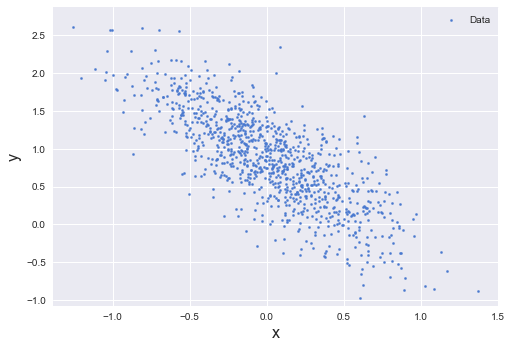

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='darkgrid')
sns.set_color_codes(palette='muted')

#generate 1000 x,y pairs with intercept and slope that we want to 
#recover using linear regression
intercept = 0.86
slope = -1.2
np.random.seed(1)
noise = np.random.normal(loc=0, scale=0.4, size=1000) # add some noise to the data
x = np.random.normal(loc=0, scale=0.4, size=1000)
y = intercept + slope * x + noise

plt.scatter(x, y, s=5, c='b', label='Data')
plt.xlim(xmin=1.1*x.min(), xmax=1.1*x.max())
plt.ylim(ymin=1.1*y.min(), ymax=1.1*y.max())
plt.xlabel('x', size=16)
plt.ylabel('y', size=16)
plt.legend(loc='upper right')
plt.show()

Clearly our fake data set has a linear trend, as we would expect since we created it that way. Let's create a class to handle linear regression on this data set.

In [1]:
class MyLinearRegressor(object):
    
    def __init__(self, x, y, epsilon=1e-3, step_size=1e-3, start=(0,0)):
    
        """
        :param: data = set of x,y data pairs to be fit
        :param: epsilon = tolerance
        :param: step_size = size of step in each parameter
        :param: start = tuple for starting point in linear params space
        
        Perform linear regression on a data set (x, y) and terminate
        once we find the fit parameters where both derivatives w.r.t.
        the fit parameters of the cost function are below the tolerance 
        epsilon.
        """
        
        self.x = x
        self.y = y
        self.epsilon = epsilon
        self.step_size = step_size
        self.fit_params = start
        self.current_cost_func = self.cost_function(start[0], start[1])
        
    def cost_function(self, param_0, param_1):
        """ 
        Function to be minimized
        """
        return np.sum(np.square(self.y - param_0 - param_1 * self.x))
    
    def take_step(self):
        
        theta_0 = self.fit_params[0]
        theta_1 = self.fit_params[1]
        
        # find slope as funct of theta_0
        self.slope_0 = (self.cost_function(theta_0 + self.step_size, theta_1) - self.current_cost_func) / self.step_size
        self.slope_1 = (self.cost_function(theta_0, theta_1 + self.step_size) - self.current_cost_func) / self.step_size
        
        theta_0 += -1 * self.slope_0 * self.step_size
        theta_1 += -1 * self.slope_1 * self.step_size

        self.fit_params = (theta_0, theta_1)
        self.current_cost_func = self.cost_function(theta_0, theta_1)
        
    def fit(self):
        
        loop_condition = True
        while loop_condition:
            
            self.take_step()
            
            if (abs(self.slope_0) < self.epsilon) and (abs(self.slope_1) < self.epsilon):
                loop_condition = False
                

In [3]:
lin_reg = MyLinearRegressor(x, y, epsilon=1e-5, step_size=1e-5)
lin_reg.fit()

fit_intercept = lin_reg.fit_params[0]
fit_slope = lin_reg.fit_params[1]
print "           Input Value     Fit Value"
print "************************************"
print "Intercept:   %.4f          %.4f"%(intercept, fit_intercept)
print "Slope:      %.4f         %.4f"%(slope, fit_slope)

           Input Value     Fit Value
************************************
Intercept:   0.8600          0.8753
Slope:      -1.2000         -1.1792


Let's see how our linear regression model compares to the scipy.stats linear regression algorithm. Looking below, we can see that the values are basically identical to ours.

In [4]:
from scipy.stats import linregress
print linregress(x, y)

LinregressResult(slope=-1.1791835143789027, intercept=0.8752974625840354, rvalue=-0.77802128131971626, pvalue=1.0936818577567433e-203, stderr=0.030140385261485384)


Finally, what does the best fit line look like plotted against our generic data set?

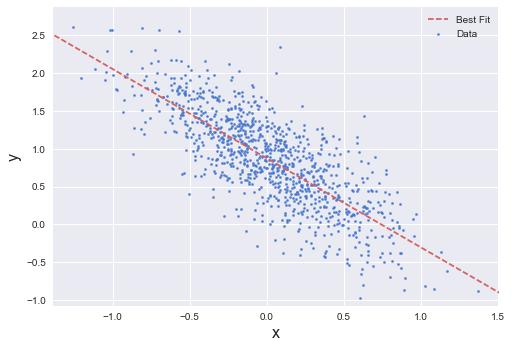

In [5]:
plt.scatter(x, y, c='b', s=5, label='Data')
temp_x = np.arange(-2, 2, 0.01)
plt.plot(temp_x, fit_intercept + fit_slope * temp_x, linestyle='--', color='r', label='Best Fit')
plt.xlim(xmin=1.1*x.min(), xmax=1.1*x.max())
plt.ylim(ymin=1.1*y.min(), ymax=1.1*y.max())
plt.xlabel('x', size=16)
plt.ylabel('y', size=16)
plt.legend(loc='upper right')
plt.show()

### Conclusion

That's linear regression in a nutshell. We used a fairly small data set, and there are more robust algorithms with more speed than this one out there, such as scipy.stats.linregress, or sklearn.linear_model.LinearRegression, but we were able to recover pretty much the same values for slope and intercept as the scipy.stats linear regression model did. 